In [3]:
import pandas as pd
import numpy as np

# data visualization library 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# machine learning library
from sklearn.preprocessing import LabelEncoder
e=LabelEncoder()

In [7]:
covid = pd.read_csv('./data/corona_tested_individuals_ver_006.english.csv')

In [8]:
covid['cough']=e.fit_transform(covid['cough'])
covid['fever']=e.fit_transform(covid['fever'])
covid['sore_throat']=e.fit_transform(covid['sore_throat'])
covid['shortness_of_breath']=e.fit_transform(covid['shortness_of_breath'])
covid['head_ache']=e.fit_transform(covid['head_ache'])
covid['corona_result']=e.fit_transform(covid['corona_result'])
covid['age_60_and_above']=e.fit_transform(covid['age_60_and_above'])
covid['gender']=e.fit_transform(covid['gender'])
covid['test_indication']=e.fit_transform(covid['test_indication'])

In [9]:
covid.describe(include='all')

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
count,278848.000000,278848.000000,278848.000000,278848.000000,278848.000000,278848.000000,278848.000000,278848.000000,278848.00000
mean,0.151437,0.078007,0.006907,0.005655,0.008657,0.052821,0.092613,1.392917,0.16764
std,0.358475,0.268183,0.082821,0.074990,0.092640,0.223676,0.289890,0.615506,0.46459
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.00000


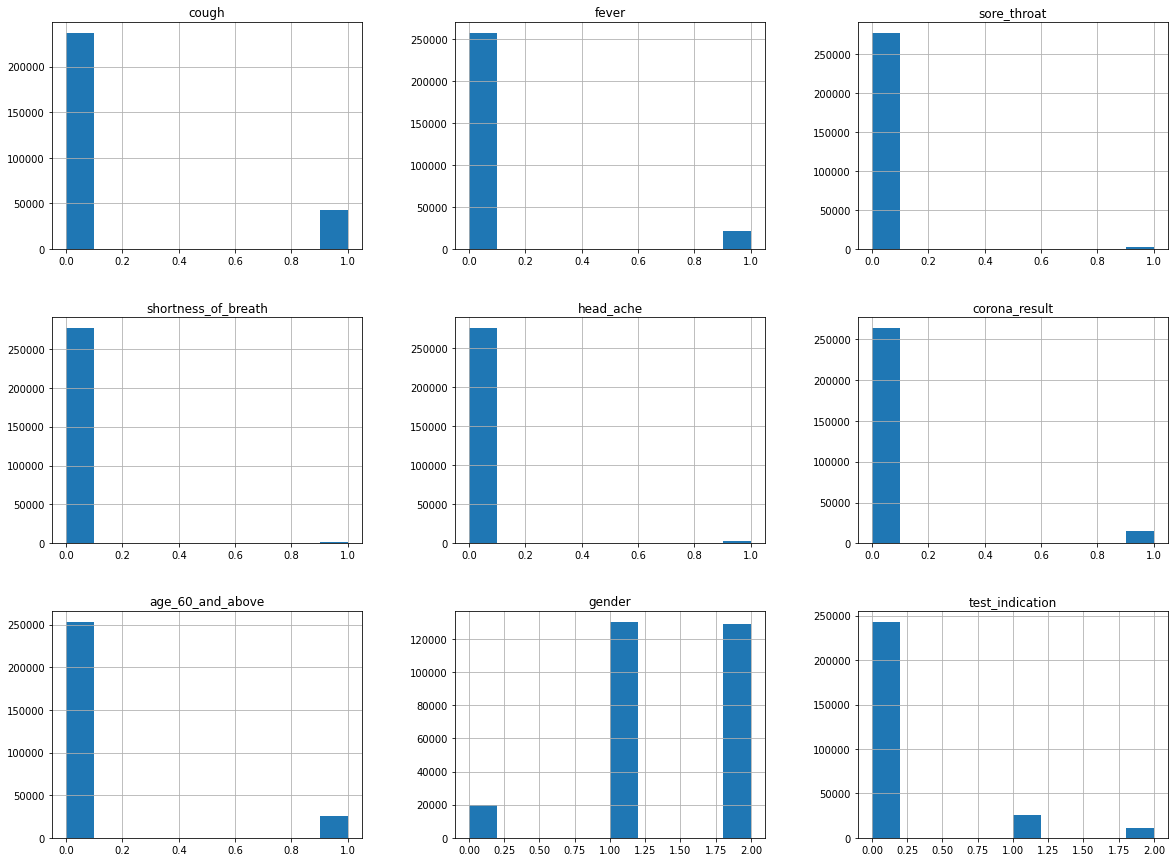

In [10]:
covid.hist(figsize=(20,15));

In [11]:
corr=covid.corr()
corr.style.background_gradient(cmap='coolwarm',axis=None)

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
cough,1.000000,0.454386,0.115637,0.106749,0.116350,0.194711,-0.007553,0.032993,0.487182
fever,0.454386,1.000000,0.122832,0.126070,0.168841,0.263649,0.015890,0.026164,0.334960
sore_throat,0.115637,0.122832,1.000000,0.197540,0.323132,0.275718,0.004127,-0.032695,0.168148
shortness_of_breath,0.106749,0.126070,0.197540,1.000000,0.202538,0.231057,0.024077,-0.039829,0.132954
head_ache,0.116350,0.168841,0.323132,0.202538,1.000000,0.364739,0.008604,-0.009088,0.199919
corona_result,0.194711,0.263649,0.275718,0.231057,0.364739,1.000000,0.046452,0.014658,0.484376
age_60_and_above,-0.007553,0.015890,0.004127,0.024077,0.008604,0.046452,1.000000,-0.011156,-0.009700
gender,0.032993,0.026164,-0.032695,-0.039829,-0.009088,0.014658,-0.011156,1.000000,0.012099
test_indication,0.487182,0.334960,0.168148,0.132954,0.199919,0.484376,-0.009700,0.012099,1.000000


In [12]:
covid.rename(columns={'test_indication' = 'contact'})

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (<ipython-input-12-affc54fd0180>, line 1)

In [13]:
covid.rename(columns={'test_indication': 'contact'})

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,contact
0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,2,0
3,1,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...
278843,0,0,0,0,0,0,0,0,0
278844,0,0,0,0,0,0,0,0,0
278845,0,0,0,0,0,1,0,0,2
278846,0,0,0,0,0,0,0,0,0


In [14]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [15]:
x=covid.drop('corona_result',axis=1)
y=covid['corona_result']

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [32]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
#Fit the model
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
#Score/Accuracy
acc_logreg=model.score(x_test, y_test)*100
acc_logreg

96.44611798457953

In [33]:
#Train the model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=30)
#Fit
model.fit(x_train, y_train)
#Score/Accuracy
acc_randomforest=model.score(x_test, y_test)*100
acc_randomforest

47.73160400422017

In [34]:
#Train the model
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators=100, max_depth=4)
#Fit
GBR.fit(x_train, y_train)
acc_gbk=GBR.score(x_test, y_test)*100
acc_gbk

47.948100485351006

In [39]:
#Train the model
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators=100, max_depth=20)
#Fit
GBR.fit(x_train, y_train)
acc_gbk=GBR.score(x_test, y_test)*100
acc_gbk

47.57423538068364

In [40]:
from sklearn import tree
t = tree.DecisionTreeClassifier()
t.fit(x_train,y_train)
y_pred = t.predict(x_test)
#Score/Accuracy
acc_decisiontree=t.score(x_test, y_test)*100
acc_decisiontree

96.87107764030841

In [41]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)
#Score/Accuracy
acc_gaussian= model.score(x_test, y_test)*100
acc_gaussian

94.60821230052

In [42]:
from sklearn import svm
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
clf.fit(x_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(x_test)
#Score/Accuracy
acc_svc=clf.score(x_test, y_test)*100
acc_svc

95.83467814237045

In [43]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes',   
              'Decision Tree', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_decisiontree,
               acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
5,Decision Tree,96.871078
1,KNN,96.854940
2,Logistic Regression,96.446118
0,Support Vector Machines,95.834678
4,Naive Bayes,94.608212
3,Random Forest,47.731604
6,Gradient Boosting Classifier,47.574235


In [44]:
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Naive Bayes',   
              'Decision Tree',],
    'Score': [acc_svc, acc_knn, acc_logreg, acc_gaussian, acc_decisiontree]})
models.sort_values(by='Score', ascending=False)

SyntaxError: illegal target for annotation (<ipython-input-44-59bac1637004>, line 1)

In [45]:
models = pd.DataFrame({
        'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Naive Bayes',   
              'Decision Tree',],
    'Score': [acc_svc, acc_knn, acc_logreg, acc_gaussian, acc_decisiontree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Decision Tree,96.871078
1,KNN,96.854940
2,Logistic Regression,96.446118
0,Support Vector Machines,95.834678
3,Naive Bayes,94.608212


In [69]:
#Train the model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth= 80,
 max_features= 8,
 min_samples_leaf= 5,
 min_samples_split= 12,
 n_estimators= 2000)
#Fit
model.fit(x_train, y_train)
#Score/Accuracy
acc_randomforest=model.score(x_test, y_test)*100
acc_randomforest

47.98312738836007

In [70]:
from sklearn import tree
t = tree.DecisionTreeClassifier()
t.fit(x_train,y_train)
y_pred = t.predict(x_test)
#Score/Accuracy
acc_decisiontree=t.score(x_test, y_test)*100
acc_decisiontree

96.87107764030841

In [2]:
from sklearn import tree
import pickle
model = tree.DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
#Score/Accuracy
acc_decisiontree=model.score(x_test, y_test)*100
acc_decisiontree

filename = 'model.sav'

pickle.dump(model, open(filename,'wb'))
print(model)

NameError: name 'x_train' is not defined

In [74]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.9687107764030841
